### Sea Ice Diagnostics for two CESM3 runs

In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cftime

In [5]:
CESM_output_dir = "/glade/campaign/cesm/development/cross-wg/diagnostic_framework/CESM_output_for_testing"
cases = ["b.e23_alpha16g.BLT1850.ne30_t232.073c","b.e23_alpha16g.BLT1850.ne30_t232.075c"]

begyr1 = 1
endyr1 = 38
begyr2 = 1
endyr2 = 38

In [7]:
# Read in two cases. The ADF timeseries are needed here.

case1 = cases[0]
case2 = cases[1]

cbegyr1 = f"{begyr1:04d}"
cendyr1 = f"{endyr1:04d}"
cbegyr2 = f"{begyr2:04d}"
cendyr2 = f"{endyr2:04d}"

ds1 = xr.open_dataset(CESM_output_dir+"/"+case1+"/ts/"+case1+".cice.h."+"aice."+cbegyr1+"01-"+cendyr1+"12.nc")
ds2 = xr.open_dataset(CESM_output_dir+"/"+case2+"/ts/"+case2+".cice.h."+"aice."+cbegyr1+"01-"+cendyr1+"12.nc")
ds3 = xr.open_dataset(CESM_output_dir+"/"+case1+"/ts/"+case1+".cice.h."+"hi."+cbegyr1+"01-"+cendyr1+"12.nc")
ds4 = xr.open_dataset(CESM_output_dir+"/"+case2+"/ts/"+case2+".cice.h."+"hi."+cbegyr1+"01-"+cendyr1+"12.nc")
ds5 = xr.open_dataset(CESM_output_dir+"/"+case1+"/ts/"+case1+".cice.h."+"hs."+cbegyr1+"01-"+cendyr1+"12.nc")
ds6 = xr.open_dataset(CESM_output_dir+"/"+case2+"/ts/"+case2+".cice.h."+"hs."+cbegyr1+"01-"+cendyr1+"12.nc")

TLAT = ds1['TLAT']
TLON = ds1['TLON']
tarea = ds1['tarea']


# Make a DataArray with the number of days in each month, size = len(time)
month_length = ds1.time.dt.days_in_month
weights_monthly = month_length.groupby("time.year") / month_length.groupby("time.year").sum()

aice1_ann = (ds1['aice'] * weights_monthly).resample(time="YS").sum(dim="time")
aice2_ann = (ds2['aice'] * weights_monthly).resample(time="YS").sum(dim="time")
hi1_ann = (ds3['hi'] * weights_monthly).resample(time="YS").sum(dim="time")
hi2_ann = (ds4['hi'] * weights_monthly).resample(time="YS").sum(dim="time")
hs1_ann = (ds5['hs'] * weights_monthly).resample(time="YS").sum(dim="time")
hs2_ann = (ds6['hs'] * weights_monthly).resample(time="YS").sum(dim="time")


aice1_seas = (ds1['aice'] * weights_monthly).resample(time="QS-JAN").sum(dim="time")
aice2_seas = (ds2['aice'] * weights_monthly).resample(time="QS-JAN").sum(dim="time")
hi1_seas = (ds3['hi'] * weights_monthly).resample(time="QS-JAN").sum(dim="time")
hi2_seas = (ds4['hi'] * weights_monthly).resample(time="QS-JAN").sum(dim="time")
hs1_seas = (ds5['hs'] * weights_monthly).resample(time="QS-JAN").sum(dim="time")
hs2_seas = (ds6['hs'] * weights_monthly).resample(time="QS-JAN").sum(dim="time")



In [8]:
def plot_diff(field1, field2, field_min, field_max, case1, case2, proj):
   # make circular boundary for polar stereographic circular plots
   theta = np.linspace(0, 2*np.pi, 100)
   center, radius = [0.5, 0.5], 0.5
   verts = np.vstack([np.sin(theta), np.cos(theta)]).T
   circle = mpath.Path(verts * radius + center)

   # set up the figure with a North Polar Stereographic projection
   fig = plt.figure(tight_layout=True)
   gs = GridSpec(2, 4)

   if (proj == "N"):
      ax = fig.add_subplot(gs[0,:2], projection=ccrs.NorthPolarStereo())
      # sets the latitude / longitude boundaries of the plot
      ax.set_extent([0.005, 360, 90, 45], crs=ccrs.PlateCarree())
   if (proj == "S"):
      ax = fig.add_subplot(gs[0,:2], projection=ccrs.SouthPolarStereo())
      # sets the latitude / longitude boundaries of the plot
      ax.set_extent([0.005, 360, -90, -45], crs=ccrs.PlateCarree())

   ax.set_boundary(circle, transform=ax.transAxes)
   ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')

   field_diff = field2-field1
   field_std = field_diff.std()

   this=ax.pcolormesh(TLON,
                      TLAT,
                      field1,
                      cmap="Blues_r",vmax=field_max,vmin=field_min,
                      transform=ccrs.PlateCarree())
   plt.colorbar(this,orientation='vertical',fraction=0.04,pad=0.01)
   plt.title(case1,fontsize=10)

   if (proj == "N"):
      ax = fig.add_subplot(gs[0,2:], projection=ccrs.NorthPolarStereo())
      # sets the latitude / longitude boundaries of the plot
      ax.set_extent([0.005, 360, 90, 45], crs=ccrs.PlateCarree())
   if (proj == "S"):
      ax = fig.add_subplot(gs[0,2:], projection=ccrs.SouthPolarStereo())
      # sets the latitude / longitude boundaries of the plot
      ax.set_extent([0.005, 360, -90, -45], crs=ccrs.PlateCarree())

   ax.set_boundary(circle, transform=ax.transAxes)
   ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')

   this=ax.pcolormesh(TLON,
                      TLAT,
                      field2,
                      cmap="Blues_r",vmax=field_max,vmin=field_min,
                      transform=ccrs.PlateCarree())
   plt.colorbar(this,orientation='vertical',fraction=0.04,pad=0.01)
   plt.title(case2,fontsize=10)

   if (proj == "N"):
      ax = fig.add_subplot(gs[1,1:3], projection=ccrs.NorthPolarStereo())
      # sets the latitude / longitude boundaries of the plot
      ax.set_extent([0.005, 360, 90, 45], crs=ccrs.PlateCarree())
   if (proj == "S"):
      ax = fig.add_subplot(gs[1,1:3], projection=ccrs.SouthPolarStereo())
      # sets the latitude / longitude boundaries of the plot
      ax.set_extent([0.005, 360, -90, -45], crs=ccrs.PlateCarree())

   ax.set_boundary(circle, transform=ax.transAxes)
   ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')

   this=ax.pcolormesh(TLON,
                      TLAT,
                      field_diff,
                      cmap="seismic",vmax=field_std*2.0,vmin=-field_std*2.0,
                      transform=ccrs.PlateCarree())
   plt.colorbar(this,orientation='vertical',fraction=0.04,pad=0.01)
   plt.title(case2+"-"+case1,fontsize=10)


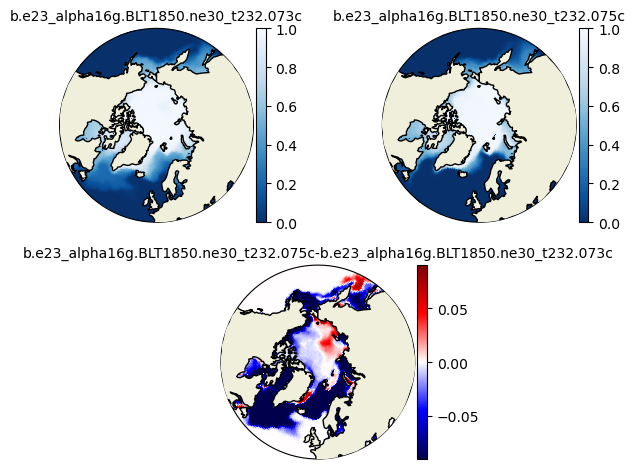

In [9]:
plot_diff(aice1_ann[::-25,:,:].mean('time'),aice2_ann[::-25,:,:].mean('time'),0.,1.,case1,case2,"N")

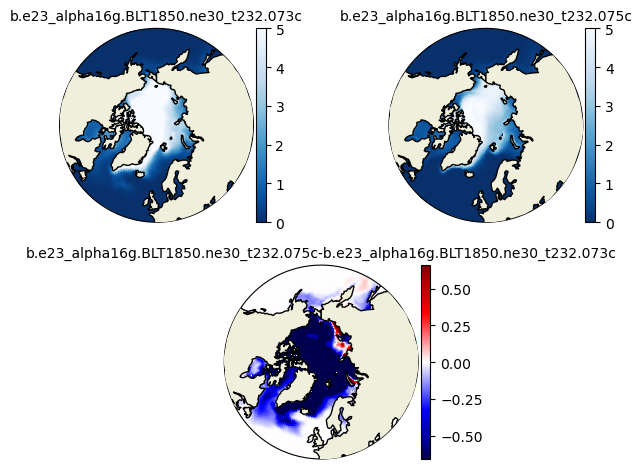

In [10]:
plot_diff(hi1_ann[::-25,:,:].mean('time'),hi2_ann[::-25,:,:].mean('time'),0.,5.,case1,case2,"N")

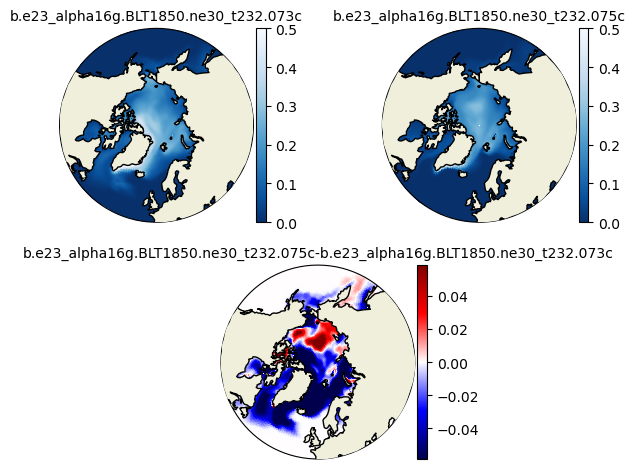

In [11]:
plot_diff(hs1_ann[::-25,:,:].mean('time'),hs2_ann[::-25,:,:].mean('time'),0.,0.5,case1,case2,"N")

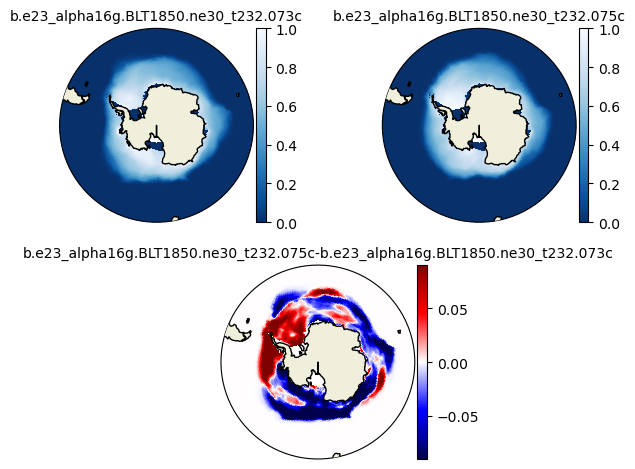

In [12]:
plot_diff(aice1_ann[::-25,:,:].mean('time'),aice2_ann[::-25,:,:].mean('time'),0.,1.,case1,case2,"S")

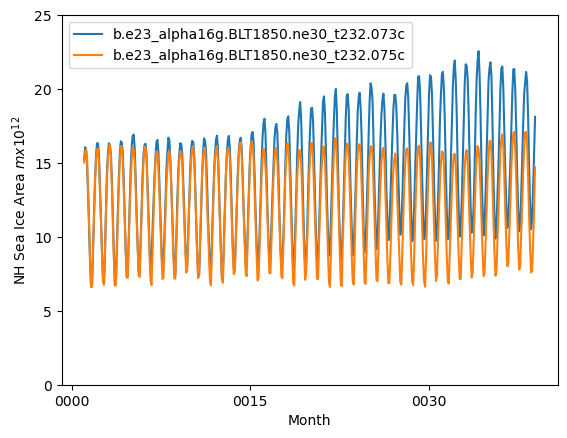

In [13]:
ds_area = (ds1.tarea*ds1.aice).where(ds1.TLAT>0).sum(dim=['nj','ni'])*1.0e-12
ds2_area = (ds2.tarea*ds2.aice).where(ds2.TLAT>0).sum(dim=['nj','ni'])*1.0e-12

ds_area.plot()
ds2_area.plot()

plt.ylim((0,25))
plt.xlabel("Month")
plt.ylabel("NH Sea Ice Area $m x 10^{12}$")
plt.legend([case1,case2])

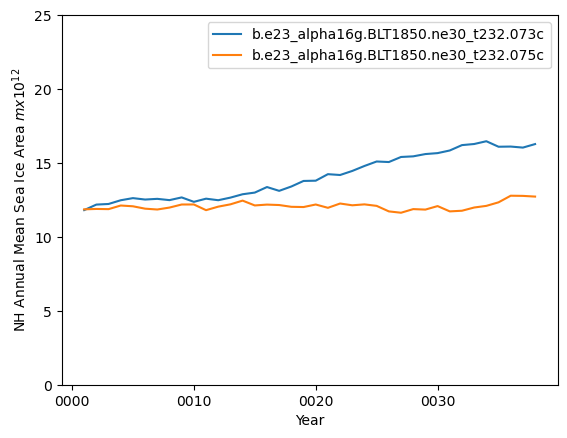

In [16]:
ds_area_ann = (ds1.tarea*aice1_ann).where(ds1.TLAT>0).sum(dim=['nj','ni'])*1.0e-12
ds2_area_ann = (ds2.tarea*aice2_ann).where(ds2.TLAT>0).sum(dim=['nj','ni'])*1.0e-12

ds_area_ann.plot()
ds2_area_ann.plot()

plt.ylim((0,25))
plt.xlabel("Year")
plt.ylabel("NH Annual Mean Sea Ice Area $m x 10^{12}$")
plt.legend([case1,case2])

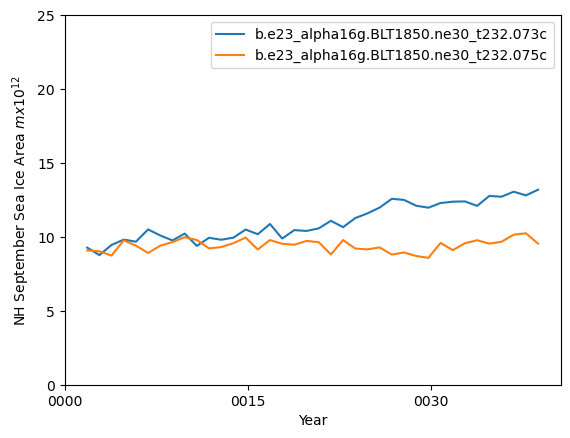

In [17]:
ds_area.sel(time=ds_area.time.dt.month.isin([10])).plot()
ds2_area.sel(time=ds2_area.time.dt.month.isin([10])).plot()

plt.ylim((0,25))
plt.xlabel("Year")
plt.ylabel("NH September Sea Ice Area $m x 10^{12}$")
plt.legend([case1,case2])

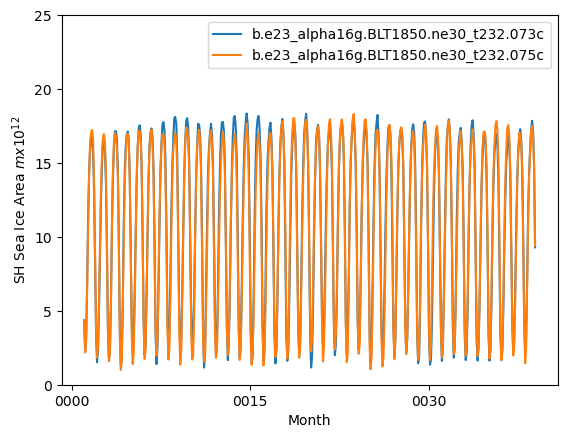

In [18]:
ds_area = (ds1.tarea*ds1.aice).where(ds1.TLAT<0).sum(dim=['nj','ni'])*1.0e-12
ds2_area = (ds2.tarea*ds2.aice).where(ds2.TLAT<0).sum(dim=['nj','ni'])*1.0e-12

ds_area.plot()
ds2_area.plot()

plt.ylim((0,25))
plt.xlabel("Month")
plt.ylabel("SH Sea Ice Area $m x 10^{12}$")
plt.legend([case1,case2])

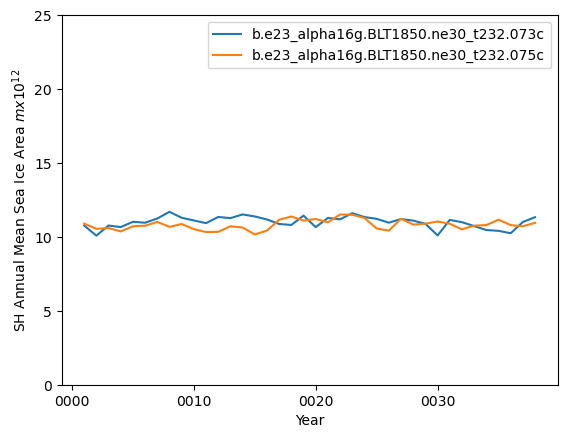

In [19]:
ds_area_ann = (ds1.tarea*aice1_ann).where(ds1.TLAT<0).sum(dim=['nj','ni'])*1.0e-12
ds2_area_ann = (ds2.tarea*aice2_ann).where(ds2.TLAT<0).sum(dim=['nj','ni'])*1.0e-12

ds_area_ann.plot()
ds2_area_ann.plot()

plt.ylim((0,25))
plt.xlabel("Year")
plt.ylabel("SH Annual Mean Sea Ice Area $m x 10^{12}$")
plt.legend([case1,case2])

In [20]:
##### Add the data values manually from the datafile.
##### Create an xarray object with the NSIDC values and the years from 1979 to 2022.

seaice_index = [4.58,4.87,4.44,4.43,4.7,4.11,4.23,4.72,5.64,5.36,4.86,4.55,4.51,5.43,4.58,5.13,4.43,5.62,\
                4.89,4.3,4.29,4.35,4.59,4.03,4.05,4.39,4.07,4.01,2.82,3.26,3.76,3.34,3.21,2.41,3.78,3.74,\
                3.42,2.91,3.35,3.35,3.17,2.83,3.47,3.47]

# Convert to m^2
seaice_index = np.array(seaice_index)
#seaice_index *= 1e12

nsidc_time = [cftime.datetime(y, 10, 15) for y in range(1,45)]

nsidc_index = xr.DataArray(data=seaice_index,coords={"time":nsidc_time})

nsidc_index


<xarray.DataArray (time: 44)>
array([4.58, 4.87, 4.44, 4.43, 4.7 , 4.11, 4.23, 4.72, 5.64, 5.36, 4.86,
       4.55, 4.51, 5.43, 4.58, 5.13, 4.43, 5.62, 4.89, 4.3 , 4.29, 4.35,
       4.59, 4.03, 4.05, 4.39, 4.07, 4.01, 2.82, 3.26, 3.76, 3.34, 3.21,
       2.41, 3.78, 3.74, 3.42, 2.91, 3.35, 3.35, 3.17, 2.83, 3.47, 3.47])
Coordinates:
  * time     (time) object 0001-10-15 00:00:00 ... 0044-10-15 00:00:00

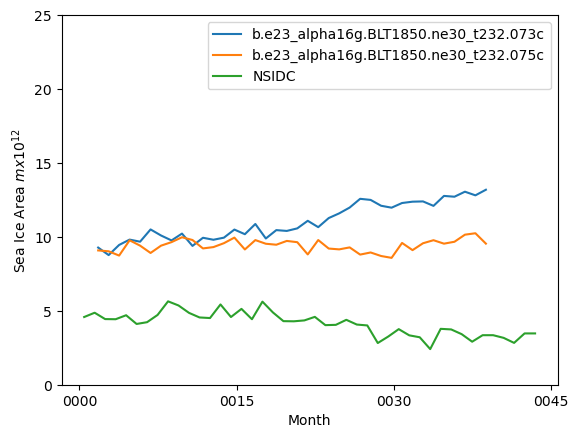

In [21]:
ds_area = (ds1.tarea*ds1.aice).where(ds1.TLAT>0).sum(dim=['nj','ni'])*1.0e-12
ds2_area = (ds2.tarea*ds2.aice).where(ds2.TLAT>0).sum(dim=['nj','ni'])*1.0e-12

ds_area.sel(time=ds_area.time.dt.month.isin([10])).plot()
ds2_area.sel(time=ds2_area.time.dt.month.isin([10])).plot()
nsidc_index.plot()

plt.ylim((0,25))
plt.xlabel("Month")
plt.ylabel("Sea Ice Area $mx10^{12}$")
plt.legend([case1,case2,"NSIDC"])